In [34]:
# Import statements
import pandas as pd
import numpy as np
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# For handling string
import glob
import string
# For regular expressions
import json
import re
import nltk
nltk.download('stopwords')


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud


import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# reading data from sample dataset
# data = pd.read_csv('amazon_pc.csv')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/translated_data.csv')

In [37]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21723 entries, 0 to 21722
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rating           21723 non-null  float64
 1   Product Name     21723 non-null  object 
 2   Review           21723 non-null  object 
 3   Sentiment        21723 non-null  int64  
 4   translated_text  21723 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 848.7+ KB


In [39]:
# print 5 records from dataset
data.head(5)

,rating,Product Name,Review,Sentiment,translated_text
0,1.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Worst phone ever Hang problem,0,Worst phone ever Hang problem
1,2.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Ok !!! Not up to the mark I'm writing this rev...,0,Ok !!! Not up to the mark I'm writing this rev...
2,5.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Awesome look Camera is so good n very fast pho...,1,Awesome look Camera is so good n very fast pho...
3,3.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",One plus losing is originality!!! The media co...,1,One plus losing is originality!!! The media co...
4,1.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Read I got my delivery on 23 feb when I unboxe...,0,Read I got my delivery on 23 feb when I unboxe...


In [40]:
data=data.drop(['Review'],axis=1)

In [7]:
# print properties of attributes in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21723 entries, 0 to 21722
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rating           21723 non-null  float64
 1   Product Name     21723 non-null  object 
 2   Sentiment        21723 non-null  int64  
 3   translated_text  21723 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 679.0+ KB


In [41]:
# Remove emoticons from the 'Text' column
data['Review'] = data['translated_text'].apply(lambda x: re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FAB0-\U0001FABF\U0001FAC0-\U0001FAFF\U0001FAD0-\U0001FAD9\U0001F300-\U0001F5FF\U0001F004-\U0001F0CF]+', '', x))
data.head(10)

,rating,Product Name,Sentiment,translated_text,Review
0,1.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,Worst phone ever Hang problem,Worst phone ever Hang problem
1,2.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,Ok !!! Not up to the mark I'm writing this rev...,Ok !!! Not up to the mark I'm writing this rev...
2,5.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,Awesome look Camera is so good n very fast pho...,Awesome look Camera is so good n very fast pho...
3,3.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,One plus losing is originality!!! The media co...,One plus losing is originality!!! The media co...
4,1.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,Read I got my delivery on 23 feb when I unboxe...,Read I got my delivery on 23 feb when I unboxe...
5,4.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,Fantastic but some bug fixes required! The med...,Fantastic but some bug fixes required! The med...
6,5.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,A good choice for upgrade Nord CE 2 is a decen...,A good choice for upgrade Nord CE 2 is a decen...
7,3.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,Camera is not good... oppo is the best Phone i...,Camera is not good... oppo is the best Phone i...
8,1.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,****VERY DISPOINTED BY 1PLUS****. Sound and ba...,****VERY DISPOINTED BY 1PLUS****. Sound and ba...
9,5.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,Excellent all rounder! The media could not be ...,Excellent all rounder! The media could not be ...


In [42]:
data=data.drop(['translated_text'],axis=1)

In [43]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text


In [44]:
# calculate raw tokens in order to measure of cleaned tokens

from nltk.tokenize import word_tokenize
raw_tokens=len([w for t in (data["Review"].apply(word_tokenize)) for w in t])
print('Number of raw tokens: {}'.format(raw_tokens))

Number of raw tokens: 504689


In [45]:
!pip install contractions

In [46]:
# get unique values of product title column
data["Product Name"].unique()

array(['OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)',
       'OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)',
       'realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)',
       'Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM',
       'Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)',
       'Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)',
       'Samsung Galaxy M32',
       'vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)'],
      dtype=object)

In [47]:
#Checking category_1 unique values
data['Product Name'].value_counts()

Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)           4084
OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)              3762
OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)    3441
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM                 3361
Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)            2517
realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)      1946
Samsung Galaxy M32                                            1316
vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)      1296
Name: Product Name, dtype: int64

In [48]:
## Summarizing the data we have

print("Summary statistics of numerical features : \n", data.describe())

print("\nTotal number of reviews: ",len(data))
print("\nTotal number of Products: ", len(list(set(data['Product Name']))))

print("\nPercentage of reviews with neutral sentiment : {:.2f}%".format(data[data['rating']==3]["Review"].count()/len(data)*100))
print("\nPercentage of reviews with positive sentiment : {:.2f}%".format(data[data['rating']>3]["Review"].count()/len(data)*100))
print("\nPercentage of reviews with negative sentiment : {:.2f}%".format(data[data['rating']<3]["Review"].count()/len(data)*100))

Summary statistics of numerical features : 
              rating     Sentiment
count  21723.000000  21723.000000
mean       3.400037      0.692078
std        1.597687      0.461645
min        1.000000      0.000000
25%        2.000000      0.000000
50%        4.000000      1.000000
75%        5.000000      1.000000
max        5.000000      1.000000

Total number of reviews:  21723

Total number of Products:  8

Percentage of reviews with neutral sentiment : 11.87%

Percentage of reviews with positive sentiment : 57.34%

Percentage of reviews with negative sentiment : 30.79%


Text(0, 0.5, 'Count')

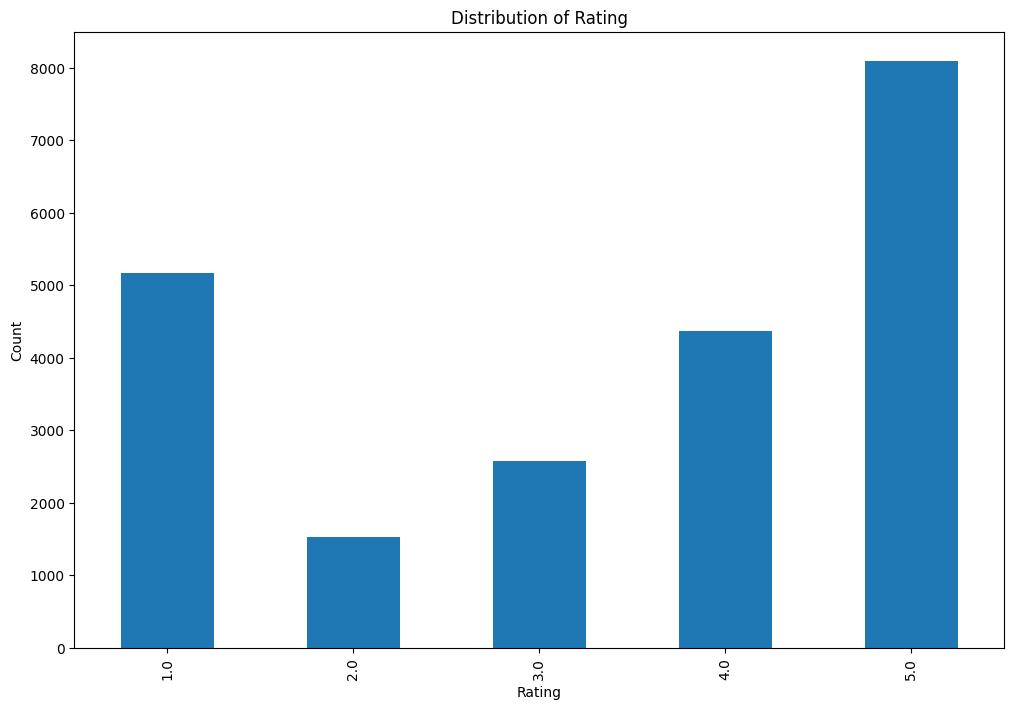

In [49]:
# Plotting distribution of rating

plt.figure(figsize=(12,8))
data['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for different Products')

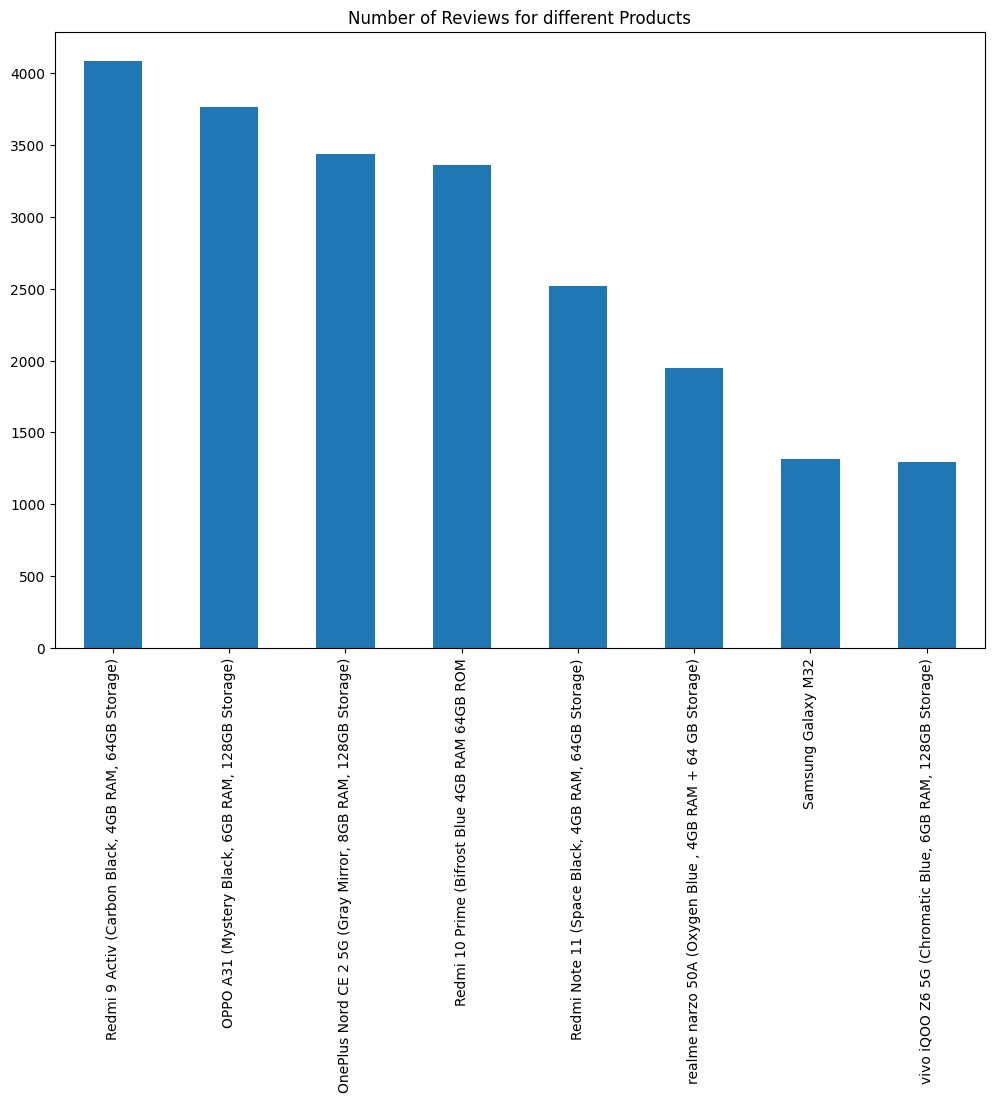

In [50]:
# Plotting  number of Reviews for different Brands

brands = data["Product Name"].value_counts()
plt.figure(figsize=(12,8))
brands[:].plot(kind='bar')
plt.title("Number of Reviews for different Products")

In [51]:
print('Produt- wise count of sentiments:')
data.groupby(['Product Name','Sentiment']).size()

Produt- wise count of sentiments:


Product Name                                                Sentiment
OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)            0            1007
                                                            1            2755
OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)  0             787
                                                            1            2654
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM               0            1297
                                                            1            2064
Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)         0            1310
                                                            1            2774
Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)          0             852
                                                            1            1665
Samsung Galaxy M32                                          0             488
                                                            1           

Text(0, 0.5, 'Count')

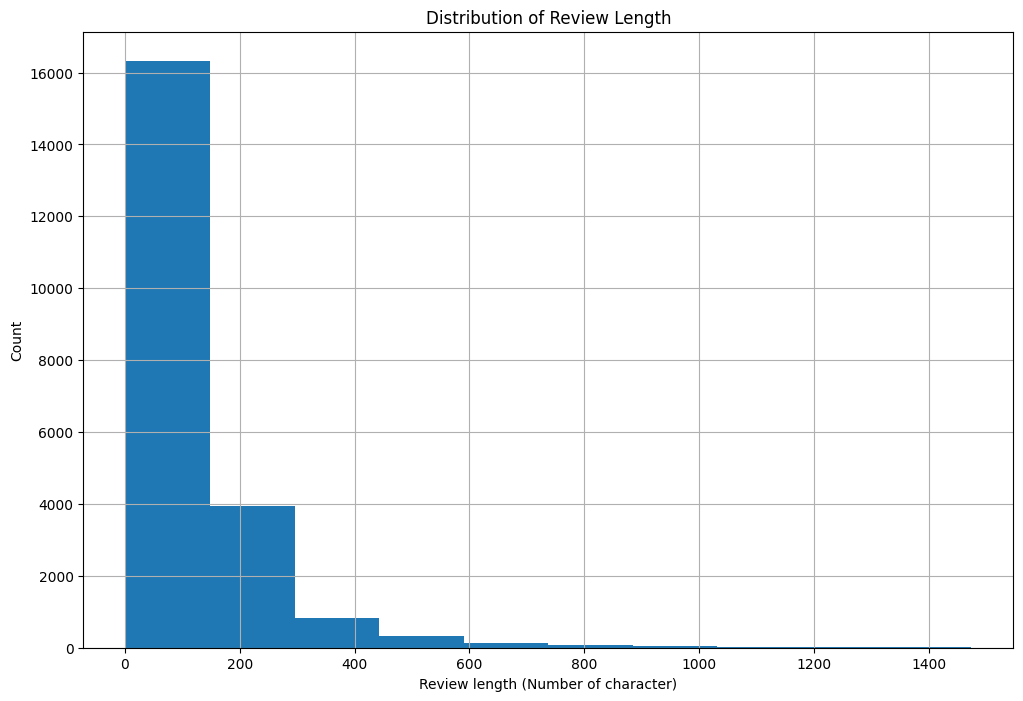

In [52]:
# Plotting distribution of review length

review_length = data["Review"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

## Text Preprocessing

In [53]:
import contractions
from contractions import contractions_dict

In [54]:
# Define function to expand contractions
def expand_match(contraction):
    if contraction:
        first_char = contraction[0]
        expanded_contraction = contractions_dict.get(contraction) if contractions_dict.get(contraction) else contractions_dict.get(contraction.lower())
        if expanded_contraction is not None and len(expanded_contraction) > 1:
            expanded_contraction = first_char + expanded_contraction[1:]
            return expanded_contraction
    return contraction





In [55]:
# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [56]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [57]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

In [58]:
def normalize_and_lemmaize(input):
    sample = denoise_text(input)
    sample = expand_match(sample)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [59]:
data['Cleaned_Review'] =data['Review'].map(lambda text: normalize_and_lemmaize(text))
data.head(10)

<ipython-input-43-d98fa070d1a8>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,rating,Product Name,Sentiment,Review,Cleaned_Review
0,1.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,Worst phone ever Hang problem,worst phone ever hang problem
1,2.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,Ok !!! Not up to the mark I'm writing this rev...,ok not mark im write review use days honest no...
2,5.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,Awesome look Camera is so good n very fast pho...,awesome look camera good n fast phone back loo...
3,3.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,One plus losing is originality!!! The media co...,one plus lose originality media could not load...
4,1.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,Read I got my delivery on 23 feb when I unboxe...,read get delivery feb unbox phone display dama...
5,4.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,Fantastic but some bug fixes required! The med...,fantastic bug fix require media could not load...
6,5.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,A good choice for upgrade Nord CE 2 is a decen...,good choice upgrade nord ce decent choice some...
7,3.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,Camera is not good... oppo is the best Phone i...,camera not good oppo best phone good heat prob...
8,1.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,****VERY DISPOINTED BY 1PLUS****. Sound and ba...,dispointed plus sound back camera poor quality...
9,5.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,Excellent all rounder! The media could not be ...,excellent rounder media could not load grey mi...


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21723 entries, 0 to 21722
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating          21723 non-null  float64
 1   Product Name    21723 non-null  object 
 2   Sentiment       21723 non-null  int64  
 3   Review          21723 non-null  object 
 4   Cleaned_Review  21723 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 848.7+ KB


In [61]:
# Let's put aside number of raw tokens in order to measure of cleaned tokens
from nltk.tokenize import word_tokenize
clean_tokens=len([w for t in (data["Cleaned_Review"].apply(word_tokenize)) for w in t])
#clean_tokens=len((product_reviews_hp4["clean_text"]))
print('Number of clean tokens: {}\n'.format(clean_tokens))
print('Percentage of removed tokens: {0:.2f}'.format(1-(clean_tokens/raw_tokens)))

Number of clean tokens: 290548

Percentage of removed tokens: 0.42


In [62]:
data.head()

,rating,Product Name,Sentiment,Review,Cleaned_Review
0,1.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,Worst phone ever Hang problem,worst phone ever hang problem
1,2.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,Ok !!! Not up to the mark I'm writing this rev...,ok not mark im write review use days honest no...
2,5.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,Awesome look Camera is so good n very fast pho...,awesome look camera good n fast phone back loo...
3,3.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,One plus losing is originality!!! The media co...,one plus lose originality media could not load...
4,1.0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,Read I got my delivery on 23 feb when I unboxe...,read get delivery feb unbox phone display dama...


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21723 entries, 0 to 21722
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating          21723 non-null  float64
 1   Product Name    21723 non-null  object 
 2   Sentiment       21723 non-null  int64  
 3   Review          21723 non-null  object 
 4   Cleaned_Review  21723 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 848.7+ KB


In [64]:
data_grouped=data[['Product Name','Cleaned_Review']].groupby(by='Product Name').agg(lambda x:' '.join(x))
data_grouped.head()

,Cleaned_Review
Product Name,
"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)",useless anazon roadside product dusty display ...
"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)",worst phone ever hang problem ok not mark im w...
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM,worst mobile mi firstly camera quality not upt...
"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)",dont buy mobile dont buy product image quality...
"Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)",not worth buy redmi pro exchange redmi im not ...


In [69]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')
data=cv.fit_transform(data_grouped['Cleaned_Review'])
data_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
data_dtm.index=data_grouped.index
data_dtm.head()

,aa,aaa,aac,aacaptx,aacha,aachh,aad,aag,aaj,aajte,...,zitter,zittering,zomato,zone,zoom,zoomeven,zoomthis,zooooooom,zthis,zx
Product Name,,,,,,,,,,,,,,,,,,,,,
"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)",0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)",2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,9,0,1,1,0,0
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM,3,0,0,0,0,0,1,0,0,0,...,0,0,0,1,10,0,0,0,0,0
"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)",0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,10,0,0,0,0,0
"Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)",2,0,1,1,1,0,0,2,0,1,...,0,0,1,0,8,0,0,0,0,0


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(analyzer='word')
data_tfidf = tfidf_vectorizer.fit_transform(data_grouped['Cleaned_Review'])
data_tfidf_df = pd.DataFrame(data_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
data_tfidf_df.index = data_grouped.index

data_tfidf_df.head()


,aa,aaa,aac,aacaptx,aacha,aachh,aad,aag,aaj,aajte,...,zitter,zittering,zomato,zone,zoom,zoomeven,zoomthis,zooooooom,zthis,zx
Product Name,,,,,,,,,,,,,,,,,,,,,
"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000656,0.000000,...,0.0,0.0,0.000000,0.000000,0.000262,0.0,0.000000,0.000000,0.000656,0.0
"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)",0.000665,0.0,0.000000,0.000000,0.000439,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.001885,0.0,0.000524,0.000524,0.000000,0.0
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM,0.001091,0.0,0.000000,0.000000,0.000000,0.000000,0.000573,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000573,0.002289,0.0,0.000000,0.000000,0.000000,0.0
"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)",0.000000,0.0,0.000000,0.000000,0.000000,0.000424,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.001693,0.0,0.000000,0.000000,0.000000,0.0
"Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)",0.000844,0.0,0.000665,0.000665,0.000558,0.000000,0.000000,0.001331,0.000000,0.000665,...,0.0,0.0,0.000665,0.000000,0.002125,0.0,0.000000,0.000000,0.000000,0.0


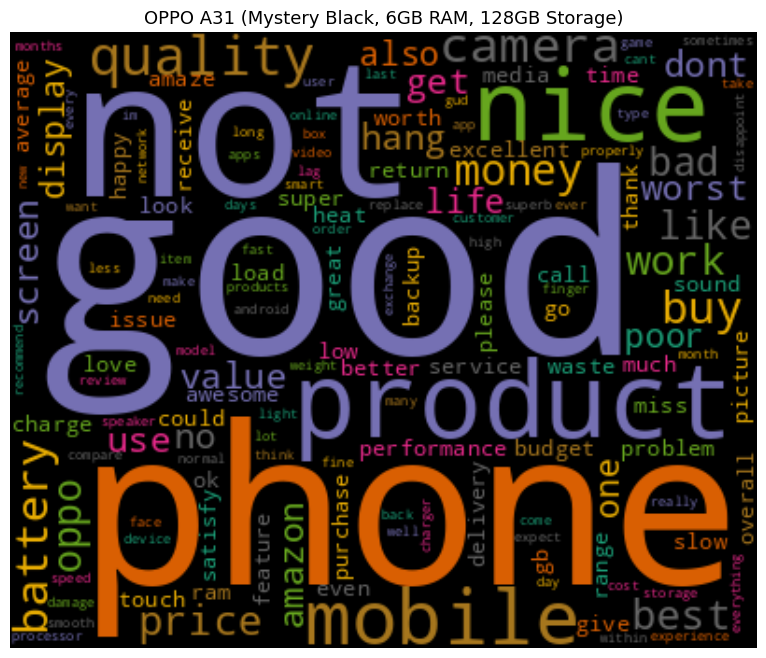

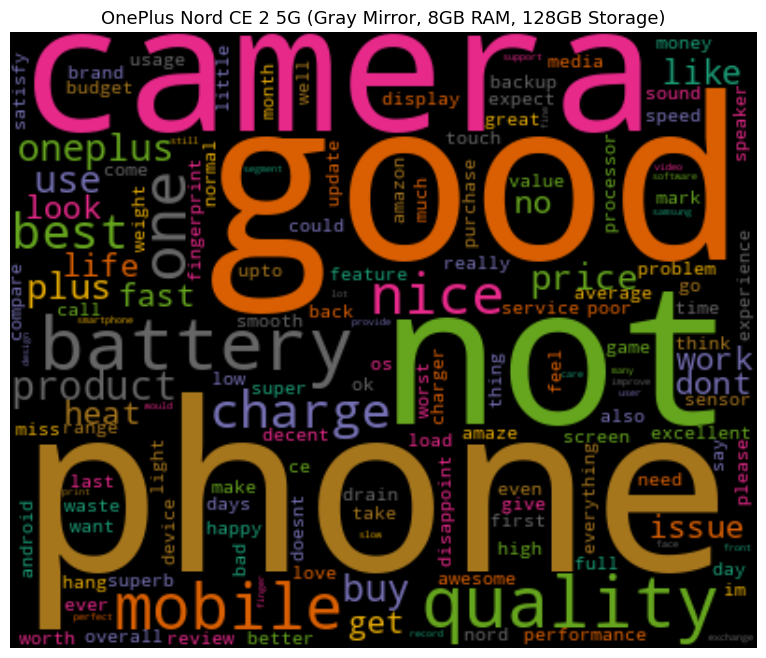

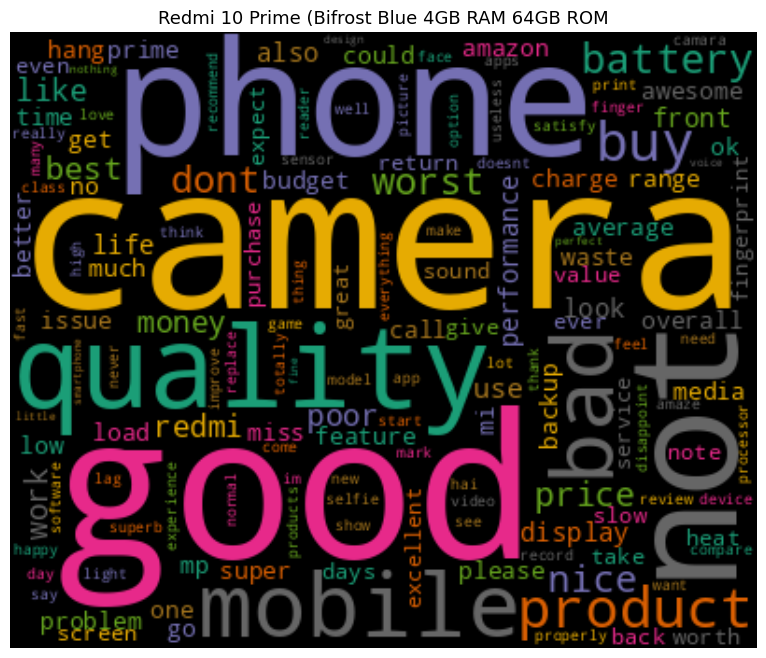

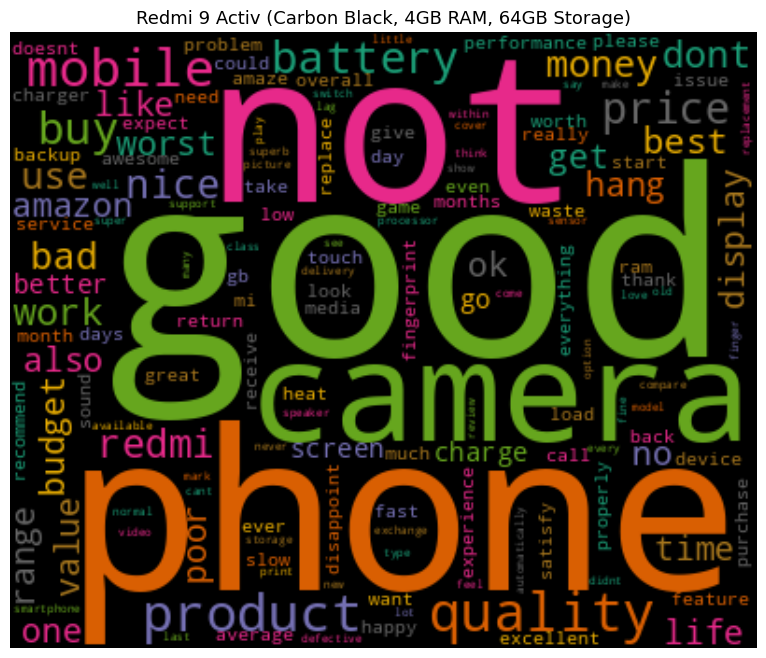

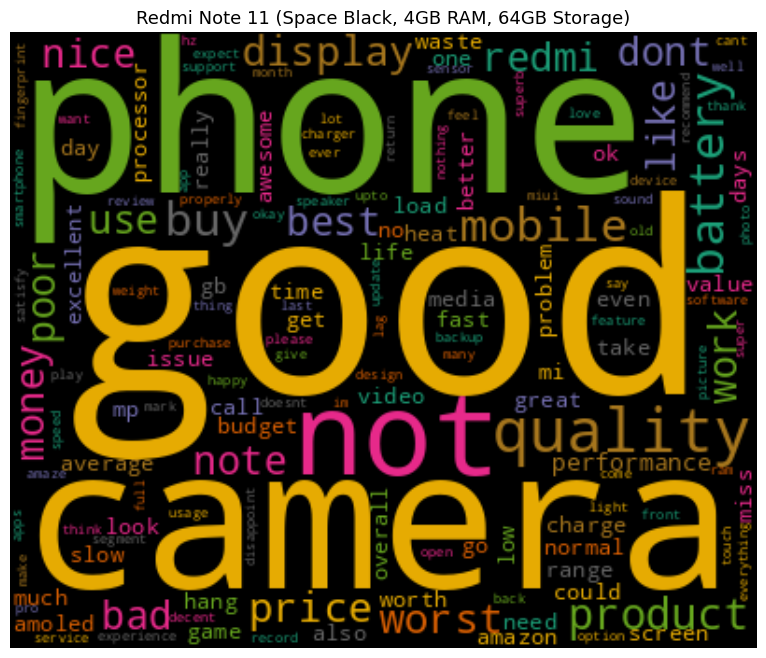

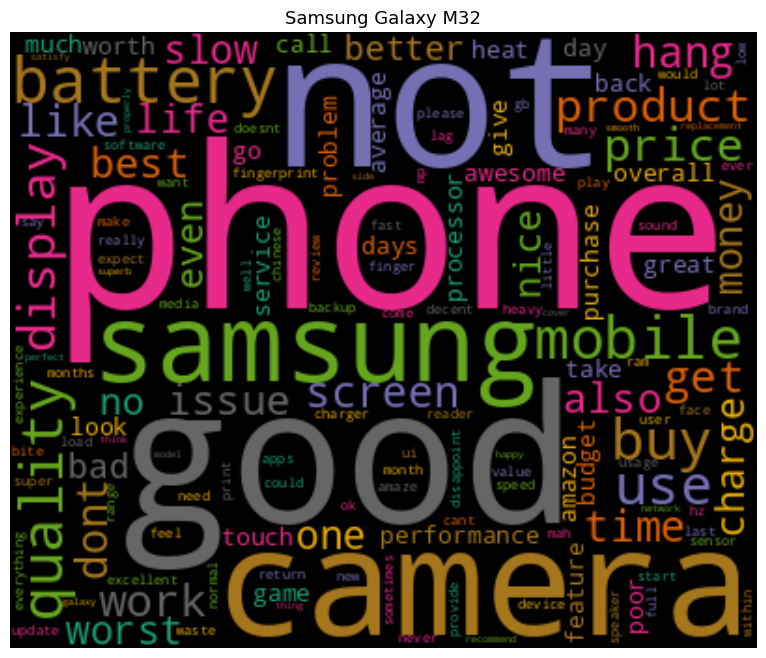

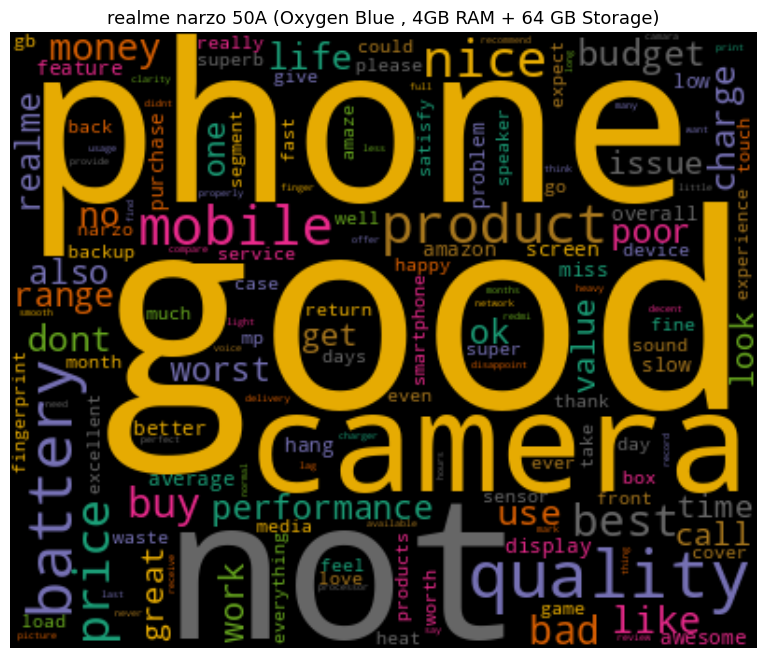

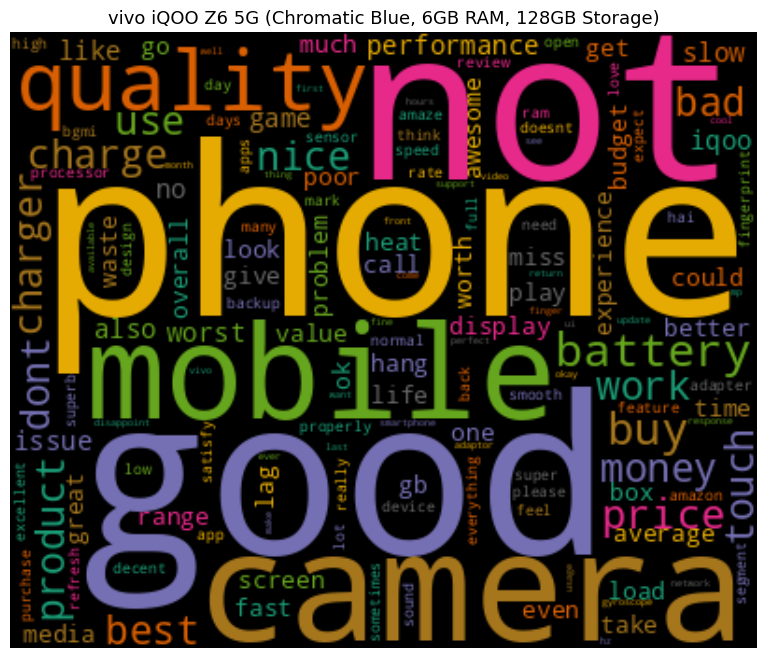

In [66]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

# Transposing document term matrix
data_dtm=data_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(data_dtm.columns):
  generate_wordcloud(data_dtm[product].sort_values(ascending=False),product)

In [ ]:
data.to_csv('clean_review_phones.csv', sep=',', encoding='utf-8')

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.1 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

classifier = pipeline(task="zero-shot-classification",
                      model="facebook/bart-large-mnli",
                      device=0)

In [ ]:
import pandas as pd
from transformers import pipeline

# Load the zero-shot classification model
classifier = pipeline("zero-shot-classification")

# Load your DataFrame
# Assuming you have a DataFrame named 'df' with a 'Review' column
# You can load your data as follows:
# df = pd.read_csv('your_data.csv')

# Define the candidate labels or categories
labels = ["camera","battery","display","value for money","performance"]  # Customize these labels as needed

# Function to classify a text using the zero-shot classification model
def classify_text(text):
    result = classifier(text, labels)
    return result['labels'][0]

# Create a new column for the classification results
data['classification'] = data['Review'].apply(classify_text)

# Save the DataFrame with the classification results to a new CSV file
data.to_csv('classified_data.csv', index=False)


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
data.head(10)